In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load Montgomery data into the dataframe.
montgomery_df = pd.read_csv(os.path.join('..', 'csv_data', 'house_info_school_assignments_dropna_transform.csv'))
montgomery_df

,price,dateSold,bathrooms,bedrooms,livingArea,homeType,lotAreaValue,zipcode,elem,middle,high,AgeYears
0,800000,Q3_2021,4.0,5.0,3650.0,SINGLE_FAMILY,222156.000000,20854,wayside elementary,herbert hoover middle,winston churchill high,42.0
1,800000,Q2_2021,1.0,2.0,1400.0,SINGLE_FAMILY,10890.000000,20814,kensington parkwood elementary,tilden middle,walter johnson high,106.0
2,800000,Q3_2020,3.0,4.0,1826.0,SINGLE_FAMILY,9148.000000,20817,bethesda elementary,tilden middle,walt whitman high,65.0
3,800000,Q2_2021,3.0,4.0,2810.0,SINGLE_FAMILY,9811.000000,20854,ritchie park elementary,cabin john middle,winston churchill high,56.0
4,800000,Q1_2021,2.0,5.0,2115.0,SINGLE_FAMILY,16521.999987,20815,bethesda elementary,thomas w. pyle middle,albert einstein high,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9667,358000,Q2_2021,4.0,3.0,1762.0,TOWNHOUSE,1800.000000,20882,woodfield elementary,hallie wells middle,clarksburg high,34.0
9668,358000,Q2_2021,3.0,3.0,1673.0,TOWNHOUSE,2001.000000,20879,strawberry knoll elementary,gaithersburg middle,gaithersburg high,42.0
9669,358500,Q1_2021,4.0,5.0,1386.0,TOWNHOUSE,1650.000000,20877,flower hill elementary,gaithersburg middle,gaithersburg high,37.0
9670,358888,Q2_2021,3.0,3.0,1420.0,TOWNHOUSE,2160.000000,20878,summit hall elementary,lakelands park middle,gaithersburg high,35.0


In [4]:
# Load school ratings data.
mcps_school_df = pd.read_csv(os.path.join('..', 'csv_data', 'mcps_school_ratings_clean.csv'))

# Keep only the school name and rating.
mcps_school_df = mcps_school_df[['School', 'Rating']]

mcps_school_df

,School,Rating
0,burning tree elementary,10.0
1,spark m. matsunaga elementary,9.0
2,bannockburn elementary,9.0
3,bells mill elementary,9.0
4,cold spring elementary,9.0
...,...,...
194,watkins mill high,4.0
195,northwood high,3.0
196,gaithersburg high,3.0
197,john f. kennedy high,3.0


In [5]:
montgomery_df = montgomery_df.merge(mcps_school_df, left_on='elem', right_on='School')
montgomery_df = montgomery_df.rename(columns={'Rating':'elemRating'})
montgomery_df = montgomery_df.drop(columns=['elem', 'School'])

In [6]:
montgomery_df = montgomery_df.merge(mcps_school_df, left_on='middle', right_on='School')
montgomery_df = montgomery_df.rename(columns={'Rating':'middleRating'})
montgomery_df = montgomery_df.drop(columns=['middle', 'School'])

In [7]:
montgomery_df = montgomery_df.merge(mcps_school_df, left_on='high', right_on='School')
montgomery_df = montgomery_df.rename(columns={'Rating':'highRating'})
montgomery_df = montgomery_df.drop(columns=['high', 'School', 'zipcode'])

In [8]:
# homeType and dataSold are categorical variable. Create dummy variables.
montgomery_df = pd.get_dummies(montgomery_df, columns=["homeType"])
montgomery_df = pd.get_dummies(montgomery_df, columns=["dateSold"])
montgomery_df = montgomery_df.dropna()
montgomery_df

,price,bathrooms,bedrooms,livingArea,lotAreaValue,AgeYears,elemRating,middleRating,highRating,homeType_CONDO,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,dateSold_Q1_2021,dateSold_Q2_2021,dateSold_Q3_2020,dateSold_Q3_2021
0,800000,4.0,5.0,3650.0,222156.000000,42.0,8.0,9.0,8.0,0,1,0,0,0,0,1
1,802909,2.0,5.0,2188.0,77513.999999,54.0,8.0,9.0,8.0,0,1,0,0,0,1,0
2,1120000,6.0,5.0,5399.0,111949.000016,43.0,8.0,9.0,8.0,0,1,0,0,0,1,0
3,1150000,5.0,5.0,5168.0,145054.999984,68.0,8.0,9.0,8.0,0,1,0,0,0,1,0
4,1300000,3.0,4.0,2062.0,87120.000000,62.0,8.0,9.0,8.0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,735405,2.0,3.0,2014.0,7533.000000,70.0,7.0,6.0,4.0,0,1,0,0,1,0,0
9668,745000,3.0,4.0,1532.0,7905.000000,83.0,7.0,6.0,4.0,0,1,0,0,0,0,1
9669,750000,2.0,2.0,1987.0,6554.000000,87.0,7.0,6.0,4.0,0,1,0,0,1,0,0
9670,755405,2.0,4.0,1841.0,6355.000000,65.0,7.0,6.0,4.0,0,1,0,0,1,0,0


In [9]:
# Separate features and target.
X = montgomery_df.drop(columns=['price'])
Y = montgomery_df['price']
print (f'Separating features and target: {X.shape} | {Y.shape}')

Separating features and target: (9530, 15) | (9530,)


In [10]:
# Split data into training and testing sets. 80% data is used for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)
print(f'After splitting data: X train:{X_train.shape}, Y train: {Y_train.shape}, \
X test: {X_test.shape}, Y test: {Y_test.shape}')

After splitting data: X train:(7624, 15), Y train: (7624,), X test: (1906, 15), Y test: (1906,)


In [11]:
# Instantiate a linear regression model and fit on training dataset.
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [12]:
# Make predictions on testing data.
Y_pred = lin_model.predict(X_test)

In [13]:
# Print the model coefficients.
print (f'Model intercept: {lin_model.intercept_}, Model coefficients: {lin_model.coef_}')

Model intercept: -628196.596480705, Model coefficients: [ 7.22427311e+04  6.77930738e+03  1.26085081e+02 -4.70693785e-04
  2.84500662e+03  2.21291353e+03  2.56484151e+04  5.54348234e+04
 -2.01190522e+05  1.52931605e+05  4.82589169e+04 -1.90349197e+04
  3.27708973e+04 -3.89819071e+04  2.52459294e+04]


In [14]:
# Print RMSE and accuracy.

# The mean squared error
print (f'Mean squared error: {mean_squared_error(Y_test, Y_pred):.2f}')

# Model accuracy:
print (f'Training accuracy: {lin_model.score(X_train, Y_train):.2f}')
print (f'Testing accuracy: {lin_model.score(X_test, Y_test):.2f}')

Mean squared error: 38128286763.85
Training accuracy: 0.76
Testing accuracy: 0.76


In [15]:
# The sklearn linear model fit doesn't give p-value information. To get this info and display
# it in a table, we will use statsmodels instead. 
# Source: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import statsmodels.api as sm

X2_train = sm.add_constant(X_train)
lin_mod = sm.OLS(Y_train,X2_train)

fii = lin_mod.fit()
summary = fii.summary2()
print (summary)

                             Results: Ordinary least squares
Model:                     OLS                     Adj. R-squared:            0.755      
Dependent Variable:        price                   AIC:                       207546.3546
Date:                      2021-09-25 13:30        BIC:                       207643.5014
No. Observations:          7624                    Log-Likelihood:            -1.0376e+05
Df Model:                  13                      F-statistic:               1805.      
Df Residuals:              7610                    Prob (F-statistic):        0.00       
R-squared:                 0.755                   Scale:                     3.8853e+10 
-----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
-----------------------------------------------------------------------------------------
const                  -396755.7451  31

In [16]:
# Now, instantiate the Random Forrest model.

# Test out different random forrest models accuracy against different number of estimators.

x_val = []
y_val = []

for n in range(3, 31):
    rf_model = RandomForestRegressor(criterion='mae', n_estimators=n, random_state=50)
    rf_model = rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    
    x_val.append(n)
    y_val.append(rf_model.score(X_test, Y_test))

    # The mean squared error
    print (f'n {n} | MSE {mean_squared_error(Y_test, Y_pred):.2f} | \
    Training Accuracy {rf_model.score(X_train, Y_train):.2f} | Testing Accuracy {rf_model.score(X_test, Y_test):.2f}')


n 3 | MSE 23105316338.41 |     Training Accuracy 0.96 | Testing Accuracy 0.85
n 4 | MSE 22481492112.36 |     Training Accuracy 0.96 | Testing Accuracy 0.86
n 5 | MSE 21448687816.45 |     Training Accuracy 0.97 | Testing Accuracy 0.86
n 6 | MSE 21222930751.51 |     Training Accuracy 0.97 | Testing Accuracy 0.87
n 7 | MSE 20627675614.96 |     Training Accuracy 0.97 | Testing Accuracy 0.87
n 8 | MSE 20159446880.91 |     Training Accuracy 0.97 | Testing Accuracy 0.87
n 9 | MSE 19963380734.55 |     Training Accuracy 0.97 | Testing Accuracy 0.87
n 10 | MSE 19795080552.26 |     Training Accuracy 0.97 | Testing Accuracy 0.87
n 11 | MSE 19899152512.90 |     Training Accuracy 0.98 | Testing Accuracy 0.87
n 12 | MSE 19628969597.15 |     Training Accuracy 0.98 | Testing Accuracy 0.88
n 13 | MSE 19630087963.56 |     Training Accuracy 0.98 | Testing Accuracy 0.88
n 14 | MSE 19570078216.88 |     Training Accuracy 0.98 | Testing Accuracy 0.88
n 15 | MSE 19660833944.01 |     Training Accuracy 0.98 | Te

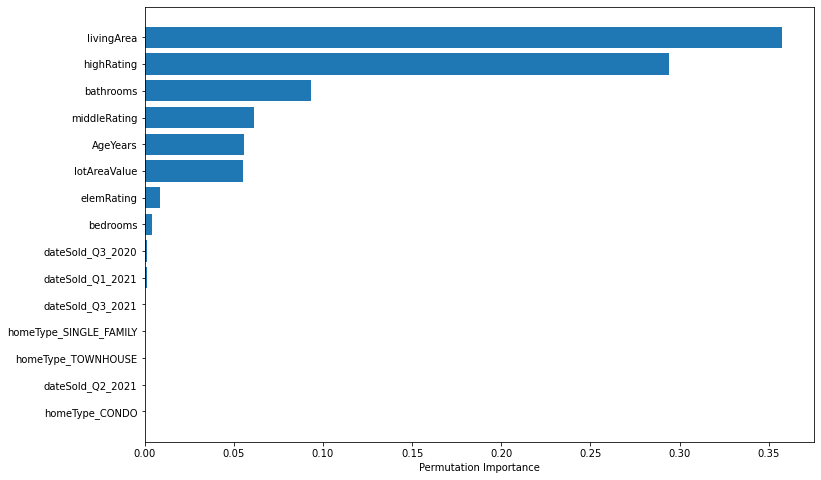

In [44]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

perm_importance = permutation_importance(rf_model, X_test, Y_test)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]

plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.gca().invert_yaxis()

<AxesSubplot:xlabel='x'>

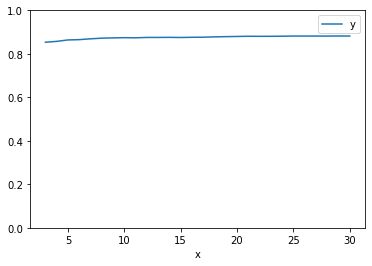

In [17]:
df = pd.DataFrame(list(zip(x_val, y_val)), columns =['x', 'y'])
df.plot.line(x='x', y='y', ylim=(0, 1.0))

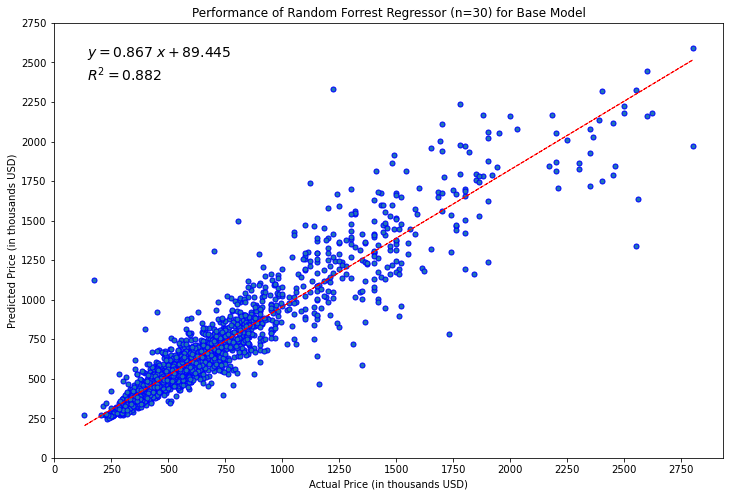

In [18]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

x = Y_test/1000
y = Y_pred/1000

plt.figure(figsize=(12,8))

plt.plot(x,y,".", ms=10, mec="b")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

plt.ylabel('Predicted Price (in thousands USD)')
plt.xlabel('Actual Price (in thousands USD)')
plt.title('Performance of Random Forrest Regressor (n=30) for Base Model')

plt.xticks(np.arange(0, 3000, step=250))
plt.yticks(np.arange(0, 3000, step=250))

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)